In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sb

In [2]:
rookies = pd.read_csv('rookies-wrc.csv')
milb = pd.read_csv('minorswrcplus.csv')

In [3]:
milb.columns

Index(['Season', 'Name', 'Team', 'Level', 'Age', 'PA', 'BB%', 'K%', 'BB/K',
       'AVG', 'OBP', 'SLG', 'OPS', 'ISO', 'Spd', 'BABIP', 'wSB', 'wRC', 'wRAA',
       'wOBA', 'wRC+', 'PlayerId'],
      dtype='object')

In [4]:
rookies.columns

Index(['Name', 'Team', 'PA', 'BB%', 'K%', 'BB/K', 'AVG', 'OBP', 'SLG', 'OPS',
       'ISO', 'Spd', 'BABIP', 'UBR', 'wGDP', 'XBR', 'wSB', 'wRC', 'wRAA',
       'wOBA', 'wRC+', 'NameASCII', 'PlayerId', 'MLBAMID'],
      dtype='object')

In [5]:
rookies.pop('wRAA')


rookies.pop('Team')

rookies.pop('PA')

rookies.pop('wGDP')


rookies.pop('BB%')

rookies.pop('K%')

rookies.pop('BB/K')

rookies.pop('wRC+')

rookies.pop('OBP')

rookies.pop('SLG')

rookies.pop('OPS')

rookies.pop('ISO')


rookies.pop('Spd')

rookies.pop('XBR')

rookies.pop('wSB')

rookies.pop('wRC')

rookies.pop('BABIP')

rookies.pop('wOBA')

rookies.pop('PlayerId')

rookies.pop('MLBAMID')

rookies.pop('UBR')

rookies.pop('NameASCII')

0           Joey Ortiz
1        Wenceel Perez
2        Colton Cowser
3         Wilyer Abreu
4      Davis Schneider
5           Masyn Winn
6        Michael Busch
7         Ivan Herrera
8      Blaze Alexander
9            Korey Lee
10       Max Schuemann
11     Jackson Merrill
12          Andy Pages
13         Jacob Young
14        Jung Hoo Lee
15       Austin Martin
16      Nolan Schanuel
17         Evan Carter
18       Trey Lipscomb
19        Austin Wells
20         Oliver Dunn
21       Michael Siani
22      Brayan Rocchio
23          Colt Keith
24     Lawrence Butler
25      Wyatt Langford
26     Jackson Chourio
27         Curtis Mead
28    Ceddanne Rafaela
29      Parker Meadows
30         Jordan Beck
Name: NameASCII, dtype: object

In [6]:
print(milb)



      Season               Name Team Level  Age   PA       BB%        K%  \
0       2024       Chris Owings  LAD   AAA   32  143  0.167832  0.286713   
1       2023       Chris Owings  PIT   AAA   31  371  0.137466  0.285714   
2       2023     Billy Hamilton  CHW   AAA   32   89  0.123596  0.325843   
3       2024      Jose Iglesias  NYM   AAA   34  157  0.050955  0.171975   
4       2023      Jose Iglesias  SDP   AAA   33  135  0.066667  0.162963   
...      ...                ...  ...   ...  ...  ...       ...       ...   
4394    2023       Luis Santana  DET    AA   23  236  0.050847  0.211864   
4395    2023       Yasel Antuna  WSN    AA   23  141  0.177305  0.262411   
4396    2023       Kevin Maitan  LAA    AA   23  200  0.115000  0.335000   
4397    2023  Lazaro Armenteros  OAK    AA   24  405  0.153086  0.328395   
4398    2024  Lazaro Armenteros  OAK   AAA   25   86  0.139535  0.430233   

          BB/K       AVG  ...       OPS       ISO       Spd     BABIP  \
0     0.585366

In [7]:
milb.pop('wRAA')


milb.pop('Team')

milb.pop('PA')

milb.pop('BB%')

milb.pop('K%')

milb.pop('BB/K')

milb.pop('wRC+')

milb.pop('OBP')

milb.pop('SLG')

milb.pop('OPS')

milb.pop('ISO')

milb.pop('Spd')

milb.pop('wSB')

milb.pop('wRC')

milb.pop('BABIP')

milb.pop('wOBA')

milb.pop('PlayerId')

0          10030
1          10030
2          10199
3          10231
4          10231
          ...   
4394    sa921577
4395    sa962601
4396    sa969045
4397    sa969091
4398    sa969091
Name: PlayerId, Length: 4399, dtype: object

In [8]:
first_string_var = "MLE" 

MLE_aaa = milb[milb["Level"] == 'AAA']
MLE_aaa

MLE_aa = milb[milb["Level"] == 'AA']
MLE_aa

MLE_aplus = milb[milb["Level"] == 'A+']
MLE_aplus

MLE_a = milb[milb["Level"] == 'A']
MLE_a

,Season,Name,Level,Age,AVG
696,2023,Graham Pauley,A,22,0.308696
743,2024,Marcus Smith,A,23,0.181818
754,2023,Scott Ota,A,25,0.260274
778,2023,Wilmer Perez,A,25,0.241379
790,2023,Freuddy Batista,A,23,0.270548
...,...,...,...,...,...
4233,2024,Nelly Taylor,A,21,0.257812
4235,2024,Chris Brito,A,24,0.250000
4236,2024,J.D. Gonzalez,A,18,0.153846
4237,2024,Cesar Hernandez,A,21,0.227273


In [9]:
MLE_aaa['MLE'] = .9  * MLE_aaa['AVG']
MLE_aaa

MLE_aa['MLE'] = .95 * MLE_aa['AVG']
MLE_aa

MLE_aplus['MLE'] = .8928 * MLE_aplus['AVG']
MLE_aplus

MLE_a['MLE'] = .8532 * MLE_a['AVG']
MLE_a

/tmp/ipykernel_98329/958986199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MLE_aaa['MLE'] = .9  * MLE_aaa['AVG']
/tmp/ipykernel_98329/958986199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MLE_aa['MLE'] = .95 * MLE_aa['AVG']
/tmp/ipykernel_98329/958986199.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,Season,Name,Level,Age,AVG,MLE
696,2023,Graham Pauley,A,22,0.308696,0.263379
743,2024,Marcus Smith,A,23,0.181818,0.155127
754,2023,Scott Ota,A,25,0.260274,0.222066
778,2023,Wilmer Perez,A,25,0.241379,0.205945
790,2023,Freuddy Batista,A,23,0.270548,0.230832
...,...,...,...,...,...,...
4233,2024,Nelly Taylor,A,21,0.257812,0.219966
4235,2024,Chris Brito,A,24,0.250000,0.213300
4236,2024,J.D. Gonzalez,A,18,0.153846,0.131262
4237,2024,Cesar Hernandez,A,21,0.227273,0.193909


In [10]:
frames = [MLE_aaa, MLE_aa, MLE_aplus, MLE_a]

MILB = pd.concat(frames)
MILB.pop('AVG')

MILB.drop_duplicates(subset='Name', keep='first', inplace=True, ignore_index=True)
MILB

,Season,Name,Level,Age,MLE
0,2024,Chris Owings,AAA,32,0.232759
1,2023,Billy Hamilton,AAA,32,0.132000
2,2024,Jose Iglesias,AAA,34,0.265772
3,2023,Rafael Ortega,AAA,32,0.203571
4,2023,Jon Singleton,AAA,31,0.232584
...,...,...,...,...,...
2146,2024,Christian Knapczyk,A,22,0.227520
2147,2024,Nelly Taylor,A,21,0.219966
2148,2024,Chris Brito,A,24,0.213300
2149,2024,J.D. Gonzalez,A,18,0.131262


In [11]:
rookies = rookies.merge(MILB, how = 'inner', on = 'Name')

<Axes: xlabel='MLE', ylabel='AVG'>

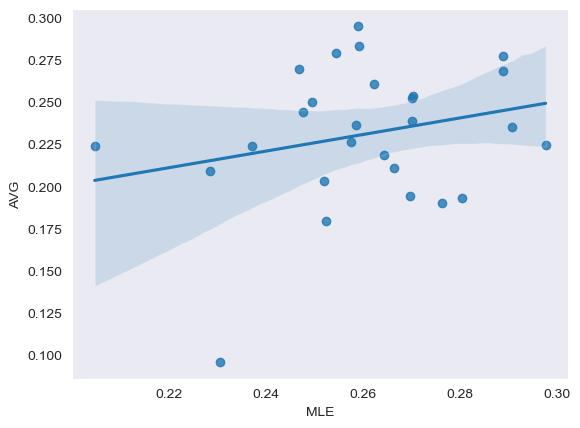

In [18]:
sb.set_style('dark') 
sb.regplot(x ='MLE', y ='AVG', data = rookies) 
    
